In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm



In [2]:
# defining spatial deritivative functions
def spatial_derivative(fxn, dx, order = 6, ghost_zone_type = 'relative anti-symmetric'):
    '''
    This function calculates the spatial derivatives of the function fxn.
    
    Parameters:
    fxn: 2D array
        The function fxn.
    dx: float
        The spatial step size.
    order: int
        The order of the finite difference scheme. It can be 2, 4, 6, 8 or 10.
        Default is 6.
    ghost_zone_type: str
        The type of the ghost zone. It can be 'anti-symmetric', 'symmetric', 'relative anti-symmetric' or None.
        Default is 'relative anti-symmetric'.
        
    Returns:
    dfdx: 2D array
        The spatial-derivative of the function fxn.
    d2fd2x: 2D array
        The second z-derivative of the function fxn.
    '''

    dfdx = np.zeros(fxn.shape)
    d2fd2x = np.zeros(fxn.shape)

    # print(f"The shape of fxn is {fxn.shape}")
    # print(f"The shape of dfdx is {dfdx.shape}")
    # print(f"The shape of d2fd2x is {d2fd2x.shape}")
    
    fxn = np.copy(fxn) # to avoid modifying the original array
    
    if order not in ['np',2, 4, 6, 8, 10]:
        raise ValueError("Order should be 'np',2, 4, 6, 8 or 10")
    
    if ghost_zone_type not in ['anti-symmetric', 'symmetric', 'relative anti-symmetric', None]:
        raise ValueError('ghost_zone_type should be anti-symmetric, symmetric, relative anti-symmetric or None')

    if order == 'np':
        ghost_zone = 3 # 3 cells on each side
    else:
        ghost_zone = int(order/2)
    
    if ghost_zone_type == 'relative anti-symmetric':
        fxn = np.pad(fxn, ((0, 0), (ghost_zone, ghost_zone)), mode='constant')
        for i in range(ghost_zone):
            fxn[:,i] = (2 * fxn[:,ghost_zone]) - fxn[:,ghost_zone + ghost_zone - i] # correcting the start of the array
            fxn[:, -1 - i] = 2 * fxn[:,-ghost_zone - 1] - fxn[:, (- ghost_zone - 1) - ghost_zone + i] # correcting the end of the array
    elif ghost_zone_type == 'anti-symmetric':
        fxn = np.pad(fxn, ((0, 0), (ghost_zone, ghost_zone)), mode='reflect') # makes symmetric padding
        for i in range(ghost_zone): 
            fxn[:,i] = - fxn[:, i] # making anti-symmetric at the start of the array
            fxn[:, -1 - i] = - fxn[:, -1 - i] # making anti-symmetric at the end of the array
    elif ghost_zone_type == 'symmetric':
        fxn = np.pad(fxn, ((0, 0), (ghost_zone, ghost_zone)), mode='symmetric')
    else:
        fxn = np.pad(fxn, ((0, 0), (ghost_zone, ghost_zone)), mode='constant') # zero padding

    # print(f"The shape of fxn after padding is {fxn.shape}")
    # print(f"The shape of dfdx after padding is {dfdx.shape}")
    # print(f"The shape of d2fd2x after padding is {d2fd2x.shape}")
    
    if order == 6:
        for i in range(ghost_zone, fxn.shape[1] - ghost_zone):
            dfdx[:,i-ghost_zone] = ((- fxn[:,i - 3]) + (9 * fxn[:,i - 2]) - (45 * fxn[:,i - 1]) + (45 * fxn[:,i + 1]) - (9 * fxn[:,i + 2]) + (fxn[:,i + 3])) / (60 * dx)
            d2fd2x[:,i-ghost_zone] = ((2 * fxn[:,i - 3]) - (27 * fxn[:,i - 2]) + (270 * fxn[:,i - 1]) - (490 * fxn[:, i]) + (270 * fxn[:,i + 1]) - (27 * fxn[:,i + 2]) + (2 * fxn[:,i + 3])) / (180 * (dx ** 2))
    elif order == 2:
        for i in range(ghost_zone, fxn.shape[1] - ghost_zone):
            dfdx[:,i-ghost_zone] = ((- fxn[:,i - 1]) + (fxn[:,i + 1])) / (2 * dx)
            d2fd2x[:,i-ghost_zone] = (fxn[:,i - 1] - (2 * fxn[:, i]) + fxn[:,i + 1]) / (dx ** 2)
    elif order == 4:
        for i in range(ghost_zone, fxn.shape[1] - ghost_zone):
            dfdx[:,i-ghost_zone] = ((fxn[:,i - 2]) - (8 * fxn[:,i - 1]) + (8 * fxn[:,i + 1]) - (fxn[:,i + 2])) / (12 * dx)
            d2fd2x[:,i-ghost_zone] = ((- fxn[:,i - 2]) + (16 * fxn[:,i - 1]) - (30 * fxn[:,i]) + (16 * fxn[:,i + 1]) - (fxn[:,i + 2])) / (12 * (dx ** 2))
    elif order == 8:
        for i in range(ghost_zone, fxn.shape[1] - ghost_zone):
            dfdx[:,i-ghost_zone] = ((3*fxn[:,i - 4]) - (32 * fxn[:,i - 3]) + (168 * fxn[:,i - 2]) - (672 * fxn[:,i - 1]) + (672 * fxn[:,i + 1]) - (168 * fxn[:,i + 2]) + (32 * fxn[:,i + 3]) - (3 * fxn[:,i + 4])) / (840 * dx)
            d2fd2x[:,i-ghost_zone] = ((-9 * fxn[:,i - 4]) + (128 * fxn[:,i - 3]) - (1008 * fxn[:,i - 2]) + (8064 * fxn[:,i - 1]) - (14350 * fxn[:,i]) + (8064 * fxn[:,i + 1]) - (1008 * fxn[:,i + 2]) + (128 * fxn[:,i + 3]) - (9 * fxn[:,i + 4])) / (5040 * (dx ** 2))
    elif order == 10:
        for i in range(ghost_zone, fxn.shape[1] - ghost_zone):
            dfdx[:,i-ghost_zone] = ((-2 * fxn[:,i - 5]) + (25 * fxn[:,i - 4]) - (150 * fxn[:,i - 3]) + (600 * fxn[:,i - 2]) - (2100 * fxn[:,i - 1]) + (2100 * fxn[:,i + 1]) - (600 * fxn[:,i + 2]) + (150 * fxn[:,i + 3]) - (25 * fxn[:,i + 4]) + (2 * fxn[:,i + 5])) / (2520 * dx)
            d2fd2x[:,i-ghost_zone] = ((8 * fxn[:,i - 5]) - (125 * fxn[:,i - 4]) + (1000 * fxn[:,i - 3]) - (6000 * fxn[:,i - 2]) + (42000 * fxn[:,i - 1]) - (73766 * fxn[:, i]) + (42000 * fxn[:,i + 1]) - (6000 * fxn[:,i + 2]) + (1000 * fxn[:,i + 3]) - (125 * fxn[:,i + 4]) + (8 * fxn[:,i + 5])) / (25200 * (dx ** 2))
    else:
        dfdx = np.gradient(fxn, dx, axis=1)
        d2fd2x = np.gradient(dfdx, dx, axis=1)
        
        # removing the ghost zones
        dfdx = dfdx[:,ghost_zone:-ghost_zone]
        d2fd2x = d2fd2x[:,ghost_zone:-ghost_zone]
            
    # update with other orders
    
    return dfdx, d2fd2x

In [3]:
def simulation(z_i, z_f, Nz, T, Nt, fn1, fn2, dfndt, order = 6, ghost_zone_type = 'symmetric', iterations_to_save = None):
    '''    
    This function simulates the time evolution of the function fxn.
    
    Parameters:
    z_i: float
        The start of the spatial domain.
    z_f: float
        The end of the spatial domain.
    Nz: int
        The number of spatial grid points.
    T: float
        The total simulation time.
    Nt: int
        The number of time steps.
    fn1: function
        The initial condition for the function fxn1.
    fn2: function
        The initial condition for the function fxn2.
    dfndt: function
        The time evolution of the function fxn.
    order: int
        
    ghost_zone_type: str
        The type of the ghost zone. It can be 'anti-symmetric', 'symmetric', 'relative anti-symmetric' or None.
        Default is 'relative anti-symmetric'.
        
    '''
    dz = (z_f - z_i) / (Nz - 1)  # Spatial step size
    dt = T / Nt  # Temporal step size
    
    # Create arrays to store the solution in time
    fxnlist = []
    T_test=[]

    # creating initial conditions from z, fn1 and fn2
    z = np.linspace(z_i, z_f, Nz)
    fxn = np.zeros((2, Nz))
    fxn[0, :] = fn1(z)  # first row is fxn1
    fxn[1, :] = fn2(z) # second row is fxn2
    
    if iterations_to_save is None:
        iterations_to_save = [0, Nt]
    elif iterations_to_save == 'all':
        iterations_to_save = list(range(0, Nt + 1))

    if 0 in iterations_to_save:
        fxnlist.append(np.copy(fxn))
    
    #--------- RK4 time-stepping block ---------#
    for n in tqdm(range(1, Nt + 1)):
        # Compute spatial derivatives
        dfndz, d2fnd2z = spatial_derivative(fxn, dz, order, ghost_zone_type)

        #d2fnd2z=(2*np.array(d2fnd2z)).tolist()

        k1 = dfndt(fxn, dfndz, d2fnd2z, n * dt)
        k2 = dfndt(fxn + (0.5 * dt * k1), dfndz, d2fnd2z, (n * dt) + (0.5 * dt))
        k3 = dfndt(fxn + (0.5 * dt * k2), dfndz, d2fnd2z, (n * dt) + (0.5 * dt))
        k4 = dfndt(fxn + (dt * k3), dfndz, d2fnd2z, (n * dt) + dt)
        
        fxn = fxn + (dt / 6.0) * (k1 + (2 * k2) + (2 * k3) + k4)
        T_test.append(np.copy(fxn))
        
        # print(fxn)
        
        if n in iterations_to_save:
            fxnlist.append(np.copy(fxn))
    #------------------------------------------#
    
    fxnlist = np.array(fxnlist)
    T_test=np.array(T_test)
    
    return fxnlist,T_test

In [4]:
Tu=10
Tl=20
lamda=2
c=2104000

start = 1
end = 10000

def expression(n,z,t):
    return ((-1)**(n-1))/(2*n-1)*np.cos((2*n-1)*np.pi*z/z_f)*np.exp(-(((2*n-1)*np.pi/z_f)**2)*lamda/c*t)

def sumfn(zlist,t):
    sol=[]
    for i,z in enumerate(zlist):
        result = np.sum(expression(np.arange(start, end+1),z,t))
        sol.append(result)
    #print(sol)
    sol1=np.array(sol)
    ans=(((sol1*2/np.pi)+0.5)*Tu)+((0.5-(sol1*2/np.pi))*Tl)
    return ans




In [5]:

delta = 0.01 # safety net to avoid division by zero
z_i = 0 + delta  # start of spatial domain
z_f = 4  + delta # end of spatial domain
T = 12  # Total simulation time
Nz = 50  # Number of spatial grid points
#Nt_z = 16329600  # Number of time steps
Nt_z = 20000
dt = T / Nt_z

# order = 'np'
order = 6
ghost_zone_type = 'symmetric'

iterations_to_save = [25,50,100,150,200,300,500,600,1000,1500,2000]# which time steps to save
#iterations_to_save = [int(i * Nt_z/10) for i in range(10 + 1)]


# defining initial conditions
def fxn20_z( z):
    return sumfn(z,0)

# def fxn20_z(  z):
#     return (3 * np.cos(((z - z_i)/(z_f - z_i))*np.pi))

def fxn10_z( z): # temporary; since we are solving the same equation in r and phi; not using now
    return 0 
# print(np.array(fxn20_z(0, 0, z)))
# print((2*np.array(fxn20_z(0, 0, z))).tolist())
# definiing the time evolution of the function
def dfndt_z(fxn, dfndz, d2fnd2z, t):
    return d2fnd2z


z = np.linspace(z_i, z_f, Nz)
fxn = np.zeros((2, Nz))

In [6]:
# running the simulation
fxnlist,T_test = simulation(z_i, z_f, Nz, T, Nt_z, fxn10_z, fxn20_z, dfndt_z, order, ghost_zone_type, iterations_to_save)

  0%|          | 37/20000 [00:00<00:54, 365.12it/s]

100%|██████████| 20000/20000 [00:48<00:00, 408.91it/s]


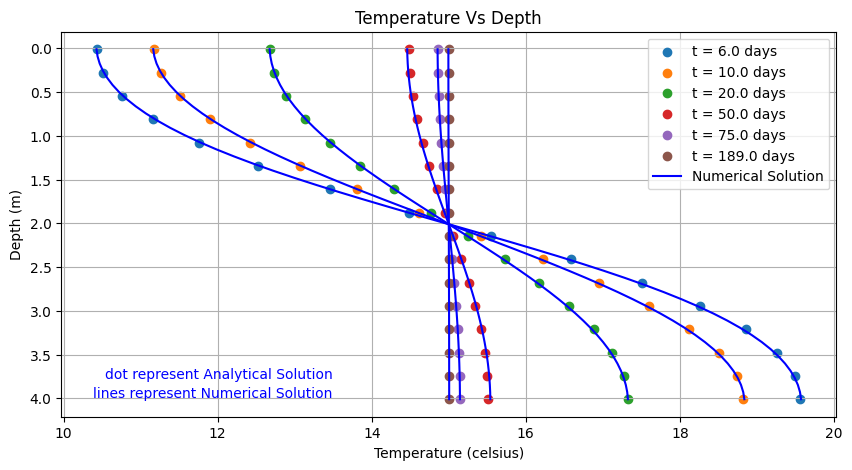

In [7]:
plt.figure(figsize=(10, 5))
plotanalyt = [518400, 864000, 1728000, 4320000, 6480000, 16329600]
plotnumerical = [843, 1405, 2830, 6940, 10633, 19999]

zan=np.linspace(z_i, z_f, int(Nz/3))

for i, val1 in enumerate(plotanalyt):
    plt.scatter( sumfn(zan, val1),zan, linestyle='-', label=f't = {plotanalyt[i]/(24*60*60)} days')

for j, val2 in enumerate(plotnumerical):
    plt.plot( T_test[val2, 1, :],np.linspace(z_i, z_f, Nz),color='blue', label="Numerical Solution" if j == 0 else None)

plt.xlabel('Temperature (celsius)')
plt.ylabel('Depth (m)')
plt.legend()
plt.title('Temperature Vs Depth')
plt.gca().invert_yaxis()
plt.grid()

# Add label indicating the circles represent the numerical solution
plt.text(0.35, 0.05, "lines represent Numerical Solution", transform=plt.gca().transAxes, ha='right', color='blue')
plt.text(0.35, 0.1, "dot represent Analytical Solution", transform=plt.gca().transAxes, ha='right', color='blue')
plt.savefig("pure_cond.png", dpi=300)
plt.show()
